In [3]:
import numpy as np
import mglearn as mg
import matplotlib.pyplot as plt

/home/gilson/.conda/envs/livro/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/gilson/.conda/envs/livro/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


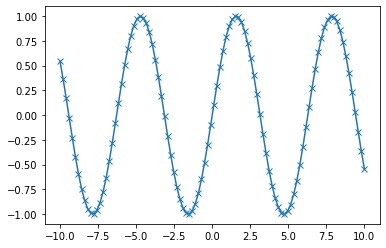

In [4]:
x = np.linspace(-10,10,100)
y=np.sin(x)
plt.plot(x,y,marker="x")

In [5]:
import pandas as pd

In [6]:
data = {'Name': ["Gilson", "Junior"],
       'Location':["Brazil", "EUA"],
       'Age': [20, 29]
       }

In [8]:
data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,Gilson,Brazil,20
1,Junior,EUA,29


In [10]:
display(data_pandas[data_pandas.Age >20])

,Name,Location,Age
1,Junior,EUA,29


In [12]:
print(data)

{'Name': ['Gilson', 'Junior'], 'Location': ['Brazil', 'EUA'], 'Age': [20, 29]}


In [ ]:
#IRIS CLASSIFICATION

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

In [16]:
print("Keys of iris_datasets:\n{}".format(iris_dataset.keys()))

Keys of iris_datasets:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [20]:
print(iris_dataset['DESCR'][:] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [21]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [23]:
print("Type of data: {}".format(iris_dataset['data'].shape))

Type of data: (150, 4)


In [24]:
print("Type of data: {}".format(iris_dataset['data'][:5]))

Type of data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [26]:
print("X_train shape: {}".format(X_train.shape))

X_train shape: (112, 4)


In [28]:
print("y_train shape: {}".format(y_train.shape))

y_train shape: (112,)


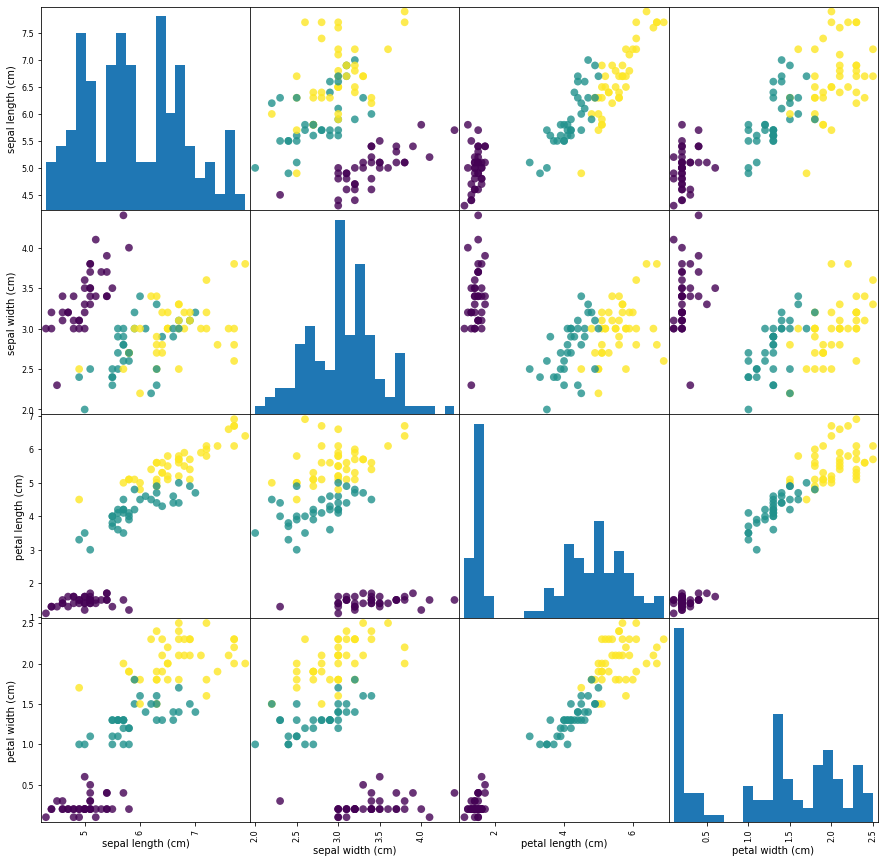

In [30]:
#scatter_matrix esta em pandas.plotting
from pandas.plotting import scatter_matrix

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                       hist_kwds={'bins': 20}, s=60, alpha=.8)


In [32]:
#k-neighbor model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
#k-neighbor prediction
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Prediction target name: {}".format(iris_dataset['target_names'][prediction]))

X_new.shape: (1, 4)
Prediction: [0]
Prediction target name: ['setosa']


In [37]:
#evaluating the model
y_pred = knn.predict(X_test)
print("Teste set predictions:\n {}".format(y_pred))

Teste set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [40]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))

Test set score: 0.97
Test set score: 0.97


/home/gilson/anaconda3/envs/livro/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second feature')

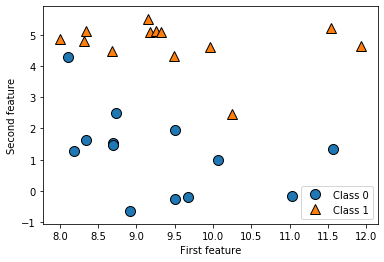

In [8]:
#Chapter 2 - Supervised machine learning algorithms
import mglearn
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

Text(0, 0.5, 'Target')

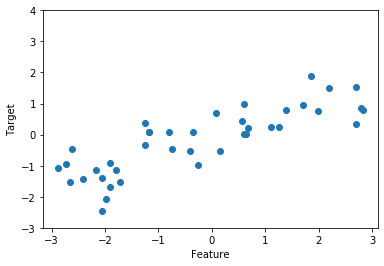

In [9]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 4)
plt.xlabel("Feature")
plt.ylabel("Target")

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(type(cancer))

<class 'sklearn.utils.Bunch'>


In [9]:
print("Sample counts per class: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [10]:
zip?

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [13]:
import mglearn as mg
X, y = mg.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


/home/gilson/anaconda3/envs/livro/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


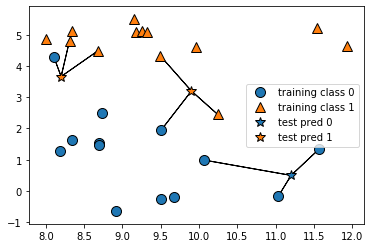

In [20]:
mg.plots.plot_knn_classification(n_neighbors=3)

In [27]:
#K-nearest neighbors classification

#impot the train and test split
from sklearn.model_selection import train_test_split

#make the dataset
X, y = mg.datasets.make_forge()

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#import the model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

#fit the model
clf.fit(X_train, y_train)

#make prediction
print("Test set predictions: {}".format(clf.predict(X_test)))

#evaluating the model predictions
print("test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
test set accuracy: 0.86


/home/gilson/anaconda3/envs/livro/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


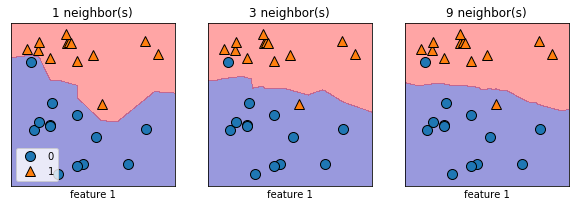

In [28]:
#plot decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mg.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_xlabel("feature 1")
axes[0].legend(loc=3)

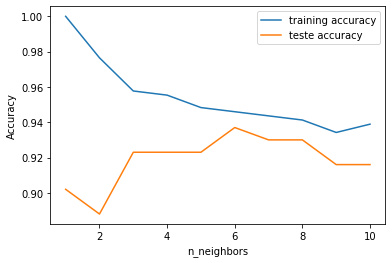

In [29]:
#using knn in breast cancer dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="teste accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

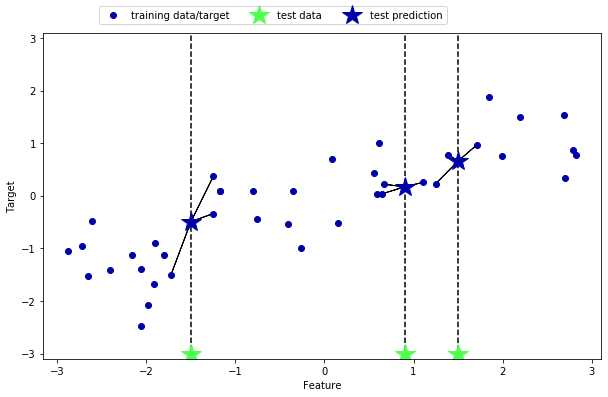

In [31]:
#k-neighbors regression
mg.plots.plot_knn_regression(n_neighbors=3)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mg.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print("Test set predictions: \n{}".format(reg.predict(X_test)))

print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


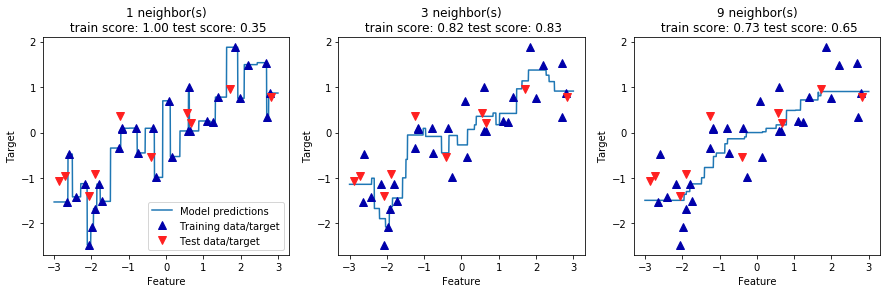

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mg.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mg.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


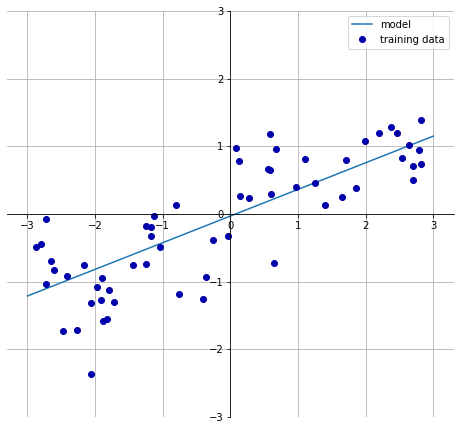

In [42]:
#linear regression

mg.plots.plot_linear_regression_wave()

In [5]:
from sklearn.linear_model import LinearRegression
X, y = mg.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

NameError: name 'train_test_split' is not defined

In [45]:
X, y = mg.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [46]:
#ridge regression - L2 regularization
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [11]:
#Lasso - L1 regularization
from sklearn.linear_model import Lasso
import mglearn as mg
from sklearn.model_selection import train_test_split

X, y = mg.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("\nTraining set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.29
Test set score: 0.21
Number of features used: 4

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


/home/gilson/anaconda3/envs/livro/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/gilson/anaconda3/envs/livro/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


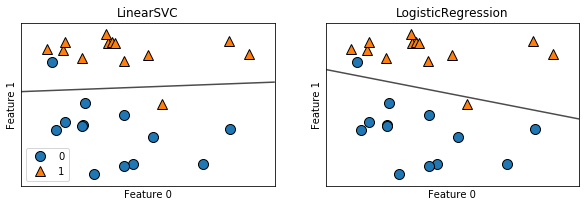

In [31]:
#Linear models for classification

#LogisticRegression and LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mg.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mg.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mg.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

/home/gilson/anaconda3/envs/livro/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/gilson/anaconda3/envs/livro/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


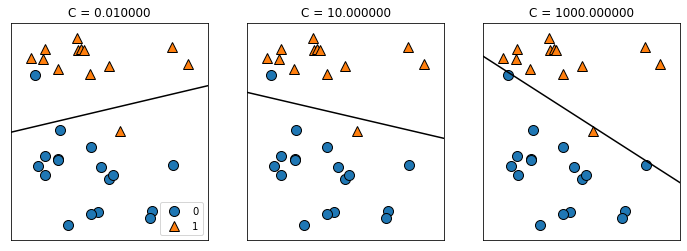

In [2]:
#C is a parameter that determines the strength of the
#regularization, when C is high the model
#try to fit the training set and stresses the importance
#that each individual data point be classified correctly.
#When the C is low, the models try to finding a coefficient
#w close to zero, and adjust to the "majority" of data points
import mglearn as mg
mg.plots.plot_linear_svc_regularization()